<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Computer%20Vision/Flower_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Dataset

In [39]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-01-24 15:35:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-24 15:35:28 (79.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [5]:
!pip install tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import tensorflow_datasets as tfds
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 6s 0us/step


In [7]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

## 2. Setting Up Data Loaders

In [111]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(data_dir,label_mode = "categorical",image_size = (224,224),validation_split = 0.2,subset = "training",seed = 42)
test_dataset = image_dataset_from_directory(data_dir,label_mode = "categorical",image_size = (224,224),validation_split = 0.2,subset = "validation",seed = 32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_dataset.class_names

## 3. Data Augmentation

In [91]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal",input_shape=(224, 224, 3)),
    preprocessing.Resizing(224,224),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.Rescaling(1./255),
    
])

## 2. Model 0 Simple Model

In [82]:
checkpoint_path ="model_1_weight_checkpoints/checkpoint.ckpt"
     
checkpoint_call_back = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    save_best_only = True,
    save_freq = "epoch"
)

In [74]:
model_0 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        strides  = (1,1),
        activation = "relu",name = "input_layer"
        ),
    tf.keras.layers.Conv2D(
        10,3,activation = "relu"
    ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(
        10,3,activation = "relu"
    ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(
        10,3,activation = "relu"
    ),
    tf.keras.layers.GlobalMaxPool2D(),
    tf.keras.layers.Dense(len(class_names),activation = "softmax",name = "output_layer"),

])
model_0.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer = "adam")

In [76]:
history_0 = model_0.fit(
    train_dataset,epochs = 10,
    steps_per_epoch = len(train_dataset),
    validation_data = test_dataset,
    validation_steps = len(test_dataset),
    callbacks = [checkpoint_call_back]
)

Epoch 1/10
92/92 [==============================] - 56s 590ms/step - loss: 1.6080 - accuracy: 0.2197 - val_loss: 1.6107 - val_accuracy: 0.2289
Epoch 2/10
92/92 [==============================] - 53s 572ms/step - loss: 1.6056 - accuracy: 0.2180 - val_loss: 1.6037 - val_accuracy: 0.2207
Epoch 3/10
92/92 [==============================] - 54s 585ms/step - loss: 1.6044 - accuracy: 0.2408 - val_loss: 1.5966 - val_accuracy: 0.2411
Epoch 4/10
92/92 [==============================] - 48s 522ms/step - loss: 1.6037 - accuracy: 0.2408 - val_loss: 1.5911 - val_accuracy: 0.2561
Epoch 5/10
92/92 [==============================] - 49s 526ms/step - loss: 1.6033 - accuracy: 0.2408 - val_loss: 1.5868 - val_accuracy: 0.2643
Epoch 6/10
92/92 [==============================] - 49s 527ms/step - loss: 1.6031 - accuracy: 0.2408 - val_loss: 1.5847 - val_accuracy: 0.2493
Epoch 7/10
92/92 [==============================] - 48s 518ms/step - loss: 1.6028 - accuracy: 0.2408 - val_loss: 1.5962 - val_accuracy: 0.2411

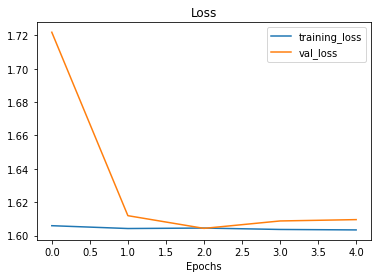

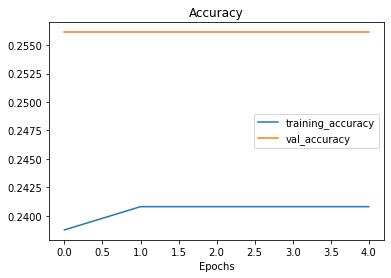

In [75]:
plot_loss_curves(history_0)

## 3. Model 1 

In [103]:
model_1 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 1024,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = "relu",padding="Same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalMaxPool2D(),
    ## Fully Connected Layer
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5,activation = "softmax",name = "output_name")
])
model_1.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer = "adam")

In [104]:
history_1 = model_1.fit(
    train_dataset,epochs = 10,
    steps_per_epoch = len(train_dataset),
    validation_data = test_dataset,
    validation_steps = len(test_dataset),
    callbacks = [checkpoint_call_back]
)

Epoch 1/10
92/92 [==============================] - 105s 1s/step - loss: 1.7000 - accuracy: 0.4094 - val_loss: 2.5054 - val_accuracy: 0.2262
Epoch 2/10
92/92 [==============================] - 103s 1s/step - loss: 1.3746 - accuracy: 0.4891 - val_loss: 5.5939 - val_accuracy: 0.2847
Epoch 3/10
92/92 [==============================] - 105s 1s/step - loss: 1.2585 - accuracy: 0.5262 - val_loss: 14.1040 - val_accuracy: 0.3556
Epoch 4/10
92/92 [==============================] - 95s 1s/step - loss: 1.1484 - accuracy: 0.5603 - val_loss: 15.4467 - val_accuracy: 0.3610
Epoch 5/10
92/92 [==============================] - 91s 978ms/step - loss: 1.0556 - accuracy: 0.5882 - val_loss: 176.1750 - val_accuracy: 0.2057
Epoch 6/10
92/92 [==============================] - 83s 899ms/step - loss: 1.0125 - accuracy: 0.6131 - val_loss: 272.2100 - val_accuracy: 0.3406
Epoch 7/10
92/92 [==============================] - 81s 884ms/step - loss: 0.9390 - accuracy: 0.6400 - val_loss: 405.0600 - val_accuracy: 0.3011


In [116]:
model_1.evaluate(test_dataset)


23/23 [==============================] - 2s 60ms/step - loss: 1797.6260 - accuracy: 0.1757
tf.Tensor(
[[[[7.91747046e+00 2.71496143e+01 6.62946403e-01]
   [1.06964283e+01 3.15446434e+01 1.00000000e+00]
   [1.23370533e+01 3.38880959e+01 2.70848013e-02]
   ...
   [2.83054886e+01 3.71074371e+01 3.41740632e+00]
   [2.60111618e+01 3.10846272e+01 4.84820557e+00]
   [2.60223217e+01 2.79062233e+01 4.95311213e+00]]

  [[7.61607170e+00 2.62407131e+01 0.00000000e+00]
   [1.07170563e+01 3.15446434e+01 9.88839149e-01]
   [1.50915184e+01 3.70915184e+01 9.09378469e-01]
   ...
   [3.30419540e+01 3.60214233e+01 5.02142477e+00]
   [3.40446434e+01 3.36964111e+01 6.18188858e+00]
   [3.40334816e+01 2.92432785e+01 5.42001486e+00]]

  [[8.30134010e+00 2.76852684e+01 0.00000000e+00]
   [1.34379387e+01 3.21258965e+01 5.81254125e-01]
   [1.55052223e+01 3.93958282e+01 6.85267925e-01]
   ...
   [3.96652031e+01 3.94553719e+01 9.03051376e+00]
   [4.13223190e+01 3.44856987e+01 1.11120491e+01]
   [3.94779701e+01 3.18

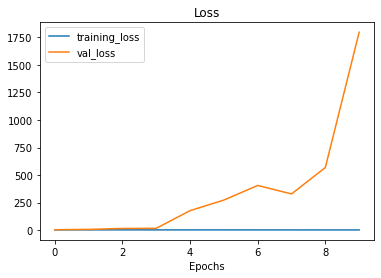

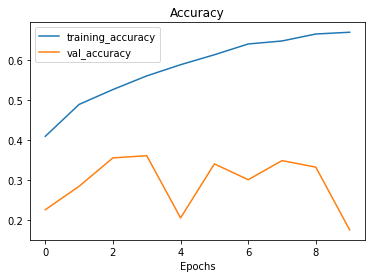

In [113]:
plot_loss_curves(history_1)